In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

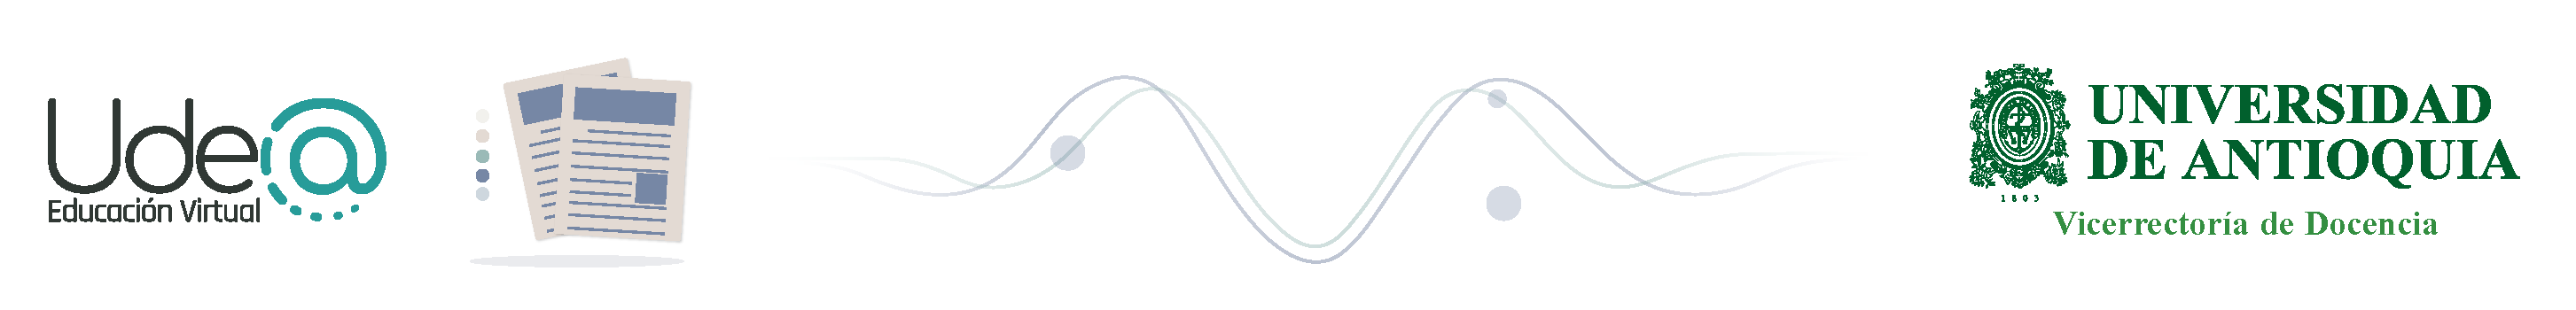

<div align="center">

#Mini-proyecto 2: Modelos de Variable Latente y Clasificadores Lineales para el Reconocimiento de Patrones

##Tratamiento de Señales III

Daniel Felipe Munoz Restrepo

Martin Alirio Barbosa Garzon 

###Facultad de Ingenierıa

###Universidad de Antioquia

###2023-1
</div>

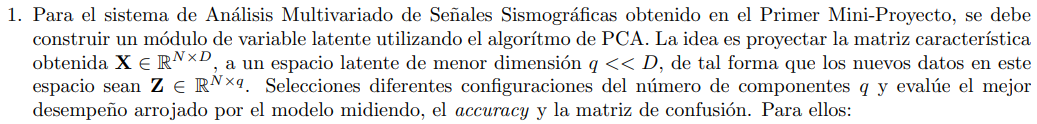

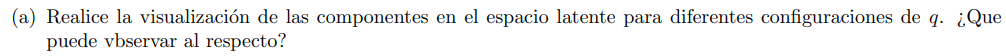

In [2]:
#Inicialmente realizamos el cargue del csv como un objeto dataframe, y lo previsualizamos

ruta_sisTele = 'https://drive.google.com/file/d/16Mul4SQnPqmGYQa9tggG5hpJAfRRX8PP/view?usp=share_link'
!gdown  "16Mul4SQnPqmGYQa9tggG5hpJAfRRX8PP" -O 'data.csv'

df = pd.read_csv('data.csv', sep = ",")
df.head()

Downloading...
From: https://drive.google.com/uc?id=16Mul4SQnPqmGYQa9tggG5hpJAfRRX8PP
To: /content/data.csv
100% 72.7k/72.7k [00:00<00:00, 100MB/s]


,Unnamed: 0,energy,max_power,max_power_freq,mean_spectrum,var_spectrum,max_spectrum,entropy,min_spectrum,no_zero_crossings,...,n5,n25,n75,n95,median,mean,std,var,rms,TipoSismo
0,0,5.310861e-02,1.419932e-02,0.390625,3.046022e-04,7.792240e-06,3.205470e-03,2.358735e-05,8.5897,150.0,...,-0.053306,-7.729353e-03,8.603073e-03,0.036545,3.591941e-04,1.179732e-03,0.054195,2.937069e-03,2.276029e-02,sisLoc
1,1,3.244844e-06,1.832449e-07,3.906250,5.284037e-06,4.242113e-10,5.961742e-05,4.607811e-07,8.5897,432.0,...,-0.000271,-9.981387e-05,9.876545e-05,0.000278,4.269650e-06,-1.405955e-06,0.000403,1.623306e-07,1.543846e-04,sisLoc
2,2,8.804790e-11,6.431583e-12,4.687500,3.225305e-08,1.080914e-14,3.264931e-07,2.796161e-09,8.5897,525.0,...,-0.000002,-5.790571e-07,5.971022e-07,0.000002,-3.080832e-09,-4.690671e-09,0.000002,4.465228e-12,8.961387e-07,sisLoc
3,3,8.978237e-02,2.309679e-02,0.195312,3.120260e-04,1.332553e-05,3.891565e-03,8.251276e-06,8.5897,111.0,...,-0.066823,-8.171886e-03,6.516919e-03,0.039791,-2.043158e-04,-4.059479e-04,0.071588,5.124898e-03,2.902386e-02,sisLoc
4,4,3.536772e-06,2.609267e-07,3.906250,3.617009e-06,5.492457e-10,5.447490e-05,7.573640e-08,8.5897,395.0,...,-0.000154,-5.767317e-05,5.347476e-05,0.000157,3.033610e-06,8.098535e-07,0.000414,1.710037e-07,1.002111e-04,sisLoc


In [3]:
# Selecciona los datos
X = df.loc[:, df.columns != 'Unnamed: 0'].iloc[:, :-1].values

# Selecciona las etiquetas
y = df.iloc[:, -1].values

# Codifica las etiquetas a valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Normaliza los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

interactive(children=(Dropdown(description='n_components', options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

<function __main__.plot_pca(n_components)>

<Figure size 640x480 with 0 Axes>

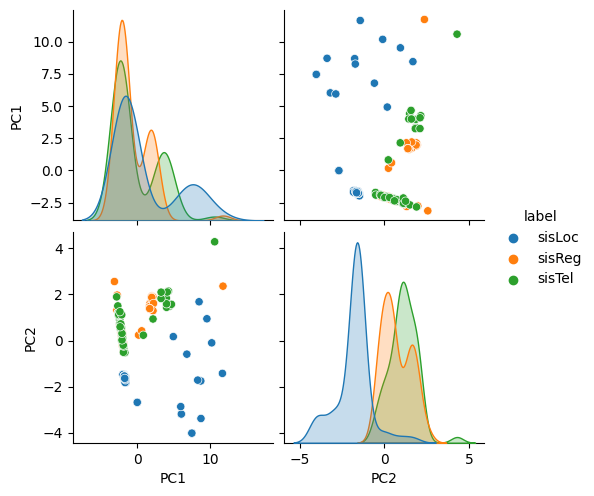

In [4]:
def plot_pca(n_components):
  
  # Crea el objeto PCA y establece el número de componentes a utilizar
  pca = PCA(n_components=n_components)

  # Aplica PCA a los datos normalizados
  X_pca = pca.fit_transform(X)

  # Transformar los datos al espacio latente
  X_latent = pca.transform(X)

  # Convertir los datos transformados a un DataFrame
  column_names = ['PC{}'.format(i+1) for i in range(n_components)]
  column_names.append('label')
  df_latent = pd.DataFrame(np.column_stack((X_latent, df.iloc[:, -1].values)), columns=column_names)


  # Agregar la etiqueta al DataFrame
  df_latent['label'] = df.iloc[:, -1].values
  
  # Limpia la figura actual
  plt.clf()  

  # Visualizar con pairplot
  sns.pairplot(df_latent, hue='label')

# Crear widget interactivo
widgets.interact(plot_pca, n_components = np.arange(2, 20, 1))

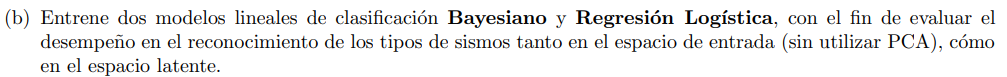

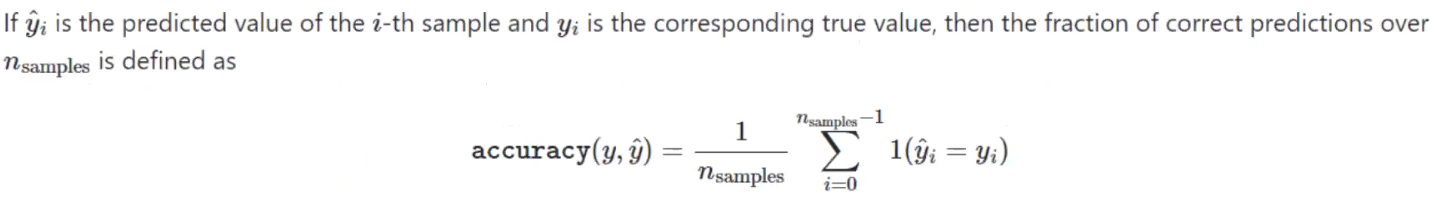



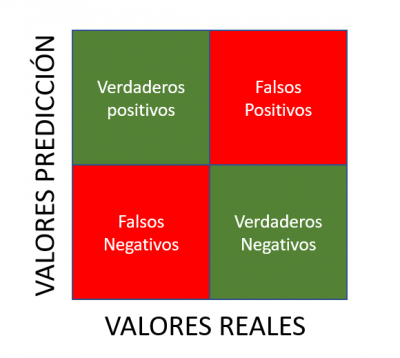

In [40]:
def train_test_split_and_fit(X_col, test_size):
  # Particionar los datos en conjuntos de entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X[:, :X_col], y, test_size=test_size, random_state=42)

  # Entrenar el clasificador Bayesiano
  clfNB = GaussianNB()
  clfNB.fit(X_train, y_train)

  # Entrenar el clasificador de regresión logística
  clfLR = LogisticRegression(random_state=0)
  clfLR.fit(X_train, y_train)

  # Realizar predicciones
  y_pred_testNB = clfNB.predict(X_test)
  y_pred_testLR = clfLR.predict(X_test)

  # Calcular la exactitud de los clasificadores
  accTest_NB = accuracy_score(y_test, y_pred_testNB)
  accTest_LR = accuracy_score(y_test, y_pred_testLR)

  print(f'El accuracy para el clasificador Bayesiano es: {accTest_NB} y para el clasificado de Regresion Logistica es: {accTest_LR}')

  # Mostrar la matriz de confusión para el clasificador Bayesiano
  cmNB = confusion_matrix(y_test, y_pred_testNB)
  disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels=df['TipoSismo'].unique() )
  disp.plot()
  plt.title('Matriz de confusión - Clasificador Bayesiano')
  plt.show()

  # Mostrar la matriz de confusión para el clasificador de regresión logística
  cmLR = confusion_matrix(y_test, y_pred_testLR)
  disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=df['TipoSismo'].unique() )
  disp.plot()
  plt.title('Matriz de confusión - Clasificador Regresión Logística')
  plt.show()

# Crear los widgets
X_col_widget = widgets.IntSlider(value=4, min=1, max=X.shape[1], step=1, description='CantCaracteristicas:')
test_size_widget = widgets.FloatSlider(value=0.3, min=0.1, max=0.5, step=0.1, description='test_size:')

# Crear la función interactiva
interactive_func = widgets.interactive(train_test_split_and_fit, X_col=X_col_widget, test_size=test_size_widget)

# Mostrar la interfaz gráfica
display(interactive_func)

interactive(children=(IntSlider(value=4, description='CantCaracteristicas:', max=19, min=1), FloatSlider(value…